In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST
dataset = MNIST(root = 'data/',download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 140MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 50.8MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 140MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.00MB/s]


In [ ]:
len(dataset)

60000

In [ ]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

label: 3


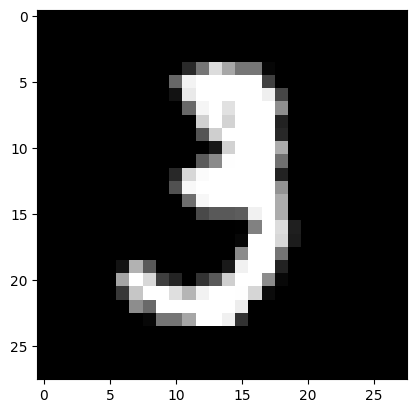

In [ ]:
image,label=dataset[10]
plt.imshow(image,cmap='gray')
print('label:',label)

In [ ]:
import torchvision.transforms as transforms
dataset = MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [ ]:
img_tensor , label=dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [ ]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


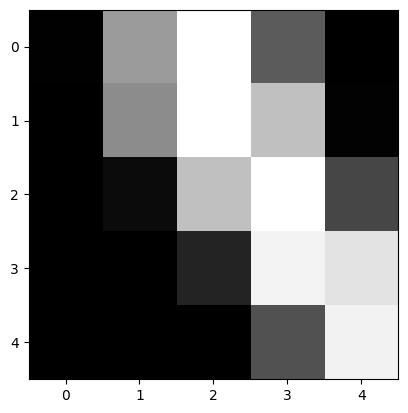

In [ ]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

In [ ]:
import numpy as np
def split_indices(n,val_pct):
  n_val = int(val_pct*n)
  idxs = np.random.permutation(n)
  return idxs[n_val:],idxs[:n_val]

In [ ]:
train_indices , val_indices = split_indices(len(dataset),val_pct = 0.2)

In [ ]:
print(len(train_indices),len(val_indices))
print('Sample val_indics: ',val_indices[:20])

48000 12000
Sample val_indics:  [14995 10213  7119 39586  8579 33029 39410 51982 20098 33061  1471 52962
  9703 51823 25911 56106 25140 23377 18330 23332]


In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [ ]:
batch_size = 100
train_sample = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,batch_size,sampler = train_sample)
val_sample = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,batch_size,sampler = val_sample)

In [ ]:
import torch.nn as nn
input_size = 28*28
num_classes = 10
model = nn.Linear(input_size,num_classes)

In [ ]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0216,  0.0204,  0.0216,  ..., -0.0307,  0.0334, -0.0091],
        [ 0.0082, -0.0192, -0.0251,  ...,  0.0154, -0.0241, -0.0016],
        [ 0.0159, -0.0347,  0.0271,  ..., -0.0304, -0.0198, -0.0102],
        ...,
        [ 0.0122, -0.0092, -0.0259,  ...,  0.0075,  0.0306,  0.0211],
        [ 0.0229, -0.0103,  0.0195,  ..., -0.0165, -0.0264,  0.0066],
        [ 0.0302, -0.0256,  0.0013,  ..., -0.0147, -0.0148, -0.0014]],
       requires_grad=True)

In [ ]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0170, -0.0063,  0.0248,  0.0353, -0.0207,  0.0193,  0.0286, -0.0219,
        -0.0101,  0.0101], requires_grad=True)

In [ ]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size,num_classes)
  def forward(self,xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out
model = MnistModel()

In [ ]:
print(model.linear.weight.shape,model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0194,  0.0091,  0.0277,  ..., -0.0261, -0.0353,  0.0317],
         [ 0.0300,  0.0085, -0.0044,  ...,  0.0316, -0.0195,  0.0119],
         [-0.0181,  0.0110,  0.0191,  ...,  0.0118,  0.0231, -0.0308],
         ...,
         [-0.0277, -0.0189,  0.0286,  ..., -0.0230,  0.0158, -0.0177],
         [-0.0074, -0.0324,  0.0319,  ..., -0.0017, -0.0296, -0.0097],
         [-0.0300,  0.0353,  0.0095,  ..., -0.0291,  0.0090,  0.0278]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0172, -0.0195,  0.0051, -0.0058,  0.0180,  0.0074, -0.0154,  0.0236,
         -0.0063,  0.0001], requires_grad=True)]

In [ ]:
for images,labels in train_loader:
  outputs = model(images)
  break
print(outputs.shape)
print('Sample outputs :\n',outputs[:2].data)

torch.Size([100, 10])
Sample outputs :
 tensor([[-0.1197, -0.0150,  0.2023, -0.0159,  0.0183, -0.1914, -0.2266,  0.2968,
         -0.0156,  0.0195],
        [-0.0040,  0.3534,  0.0048,  0.1990,  0.0912, -0.1075, -0.1723,  0.3322,
         -0.1007, -0.2317]])


In [ ]:
import torch.nn.functional as F

In [ ]:
probs = F.softmax(outputs,dim=1)
print('Sample probabilities : \n',probs[:2].data)
print('Sum : ',torch.sum(probs[0]).item())

Sample probabilities : 
 tensor([[0.0881, 0.0978, 0.1215, 0.0977, 0.1011, 0.0820, 0.0792, 0.1336, 0.0977,
         0.1012],
        [0.0942, 0.1347, 0.0950, 0.1154, 0.1036, 0.0850, 0.0796, 0.1319, 0.0855,
         0.0750]])
Sum :  1.0


In [ ]:
max_probs ,  preds  = torch.max(probs , dim = 1)
print(preds)

tensor([7, 1, 1, 8, 0, 7, 1, 8, 7, 8, 8, 7, 7, 7, 8, 7, 4, 0, 4, 3, 0, 7, 7, 0,
        7, 1, 0, 3, 0, 3, 7, 3, 9, 7, 0, 8, 8, 0, 7, 8, 4, 0, 8, 7, 3, 7, 3, 0,
        7, 8, 4, 1, 0, 7, 7, 1, 7, 8, 7, 1, 1, 7, 8, 7, 8, 1, 7, 4, 7, 8, 0, 4,
        7, 8, 3, 7, 8, 4, 7, 7, 7, 7, 1, 0, 7, 2, 7, 0, 8, 7, 7, 1, 1, 7, 0, 8,
        1, 8, 0, 7])


In [ ]:
labels

tensor([1, 2, 5, 8, 9, 0, 0, 6, 0, 4, 0, 6, 2, 2, 0, 3, 2, 9, 3, 3, 5, 3, 2, 9,
        0, 6, 7, 9, 5, 5, 8, 2, 5, 1, 3, 4, 9, 5, 9, 0, 4, 5, 2, 8, 2, 3, 2, 9,
        2, 2, 4, 3, 0, 0, 5, 5, 6, 6, 0, 1, 3, 6, 3, 3, 0, 3, 2, 4, 8, 2, 9, 9,
        1, 0, 2, 2, 8, 9, 0, 1, 8, 2, 7, 5, 5, 7, 3, 7, 2, 6, 8, 3, 3, 3, 1, 6,
        3, 5, 9, 2])

In [ ]:
labels == preds

tensor([False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
         True, False,  True, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False])

In [ ]:
def accuracy(l1,l2):
  return torch.sum(l1==l2).item()/len(l1)

In [ ]:
accuracy(preds,labels)

0.08

In [ ]:
loss_fn = F.cross_entropy

In [ ]:
loss = loss_fn(outputs,labels)
print(loss)

tensor(2.3239, grad_fn=<NllLossBackward0>)


In [ ]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [ ]:
def loss_batch(model,loss_func,xb,yb,opt=None,metric=None):
  preds = model(xb)
  loss = loss_func(preds , yb)
  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()
  metric_result = None
  if metric is not None:
    metric_result = metric(preds,yb)
  return loss.item(),len(xb),metric_result

In [ ]:
def evaluate(model,loss_fn,valid_dl,metric=None):
  with torch.no_grad():
    results = [loss_batch(model,loss_fn,xb,yb,metric=metric) for xb , yb in valid_dl]
    losses , nums , metrices = zip(*results)
    total = np.sum(nums)
    avg_loss = np.sum(np.multiply(losses,nums))/total
    avg_metric = None
    if metric is not None:
      avg_metrices = np.sum(np.multiply(metrices,nums))/total
  return avg_loss,total,avg_metrices

In [ ]:
def accuracy(outputs,labels):
  _, preds = torch.max(outputs,dim=1)
  return torch.sum(preds == labels).item()/len(preds)

In [ ]:
def accuracy(outputs,labels):
  _,preds = torch.max(outputs,dim=1)
  return torch.sum(preds==labels).item()/len(preds)

In [ ]:
val_loss , total , val_acc = evaluate(model,loss_fn,val_loader,metric=accuracy)
print('loss : {:.4f}, Accuracy : {:.4f}'.format(val_loss,val_acc))

loss : 2.3158, Accuracy : 0.0823


In [ ]:
def fit(epochs,model,loss_fn,opt,train_dl,valid_dl,metric=None):
  for epoch in range(epochs):
    for xb,yb in train_dl:
      loss,_,_ = loss_batch(model,loss_fn,xb,yb,opt)
    result = evaluate(model,loss_fn,valid_dl,metric)
    val_loss , total , val_metric = result
    if metric is None:
      print('Epoch[{}/{}], loss: {:.4f}'.format(epoch+1,epochs,val_loss))
    else:
      print('Epoch[{}/{}], loss: {:.4f},{}: {:.4f}'.format(epoch+1,epochs,val_loss,metric.__name__,val_metric))

In [ ]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [ ]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch[1/5], loss: 1.8838,accuracy: 0.6339
Epoch[2/5], loss: 1.5897,accuracy: 0.7365
Epoch[3/5], loss: 1.3820,accuracy: 0.7691
Epoch[4/5], loss: 1.2320,accuracy: 0.7869
Epoch[5/5], loss: 1.1204,accuracy: 0.7979


In [ ]:
test_dataset = MNIST(root='data/',
                     train=False,
                     transform = transforms.ToTensor())

Shape:  torch.Size([1, 28, 28])
Label:  7


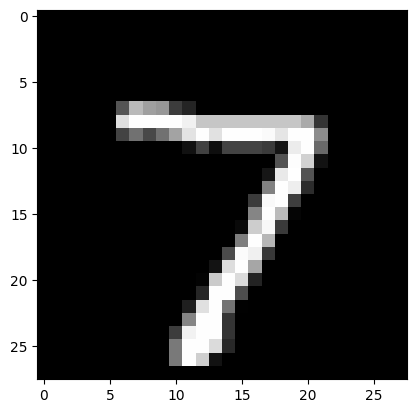

In [ ]:
img,label = test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Shape: ',img.shape)
print('Label: ',label)

In [ ]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [ ]:
def predict_image(img,model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _,preds = torch.max(yb,dim=1)
  return preds[0].item()

Label:  2 , Predicted:  8


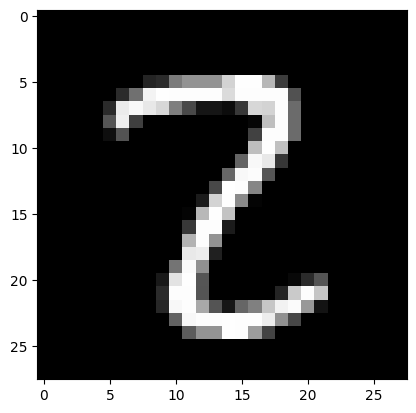

In [ ]:
img , label = test_dataset[1839]
plt.imshow(img[0],cmap='gray')
print('Label: ',label,', Predicted: ',predict_image(img,model))

wrong prediction in above at index 1839

In [ ]:
test_loader = DataLoader(test_dataset,batch_size=200)
test_loss, total, test_acc = evaluate(model,loss_fn,test_loader,metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss,test_acc))

Loss: 1.0883, Accuracy: 0.8193


In [ ]:
torch.save(model.state_dict(),'mnist-logistic.pth')

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0049, -0.0092,  0.0091,  ..., -0.0067, -0.0194, -0.0346],
                      [-0.0194, -0.0156,  0.0040,  ..., -0.0022,  0.0185,  0.0020],
                      [ 0.0273,  0.0059, -0.0203,  ...,  0.0210, -0.0016, -0.0289],
                      ...,
                      [-0.0273,  0.0071,  0.0066,  ..., -0.0149, -0.0267,  0.0345],
                      [-0.0109,  0.0065,  0.0352,  ..., -0.0340, -0.0187,  0.0298],
                      [ 0.0147, -0.0312, -0.0188,  ..., -0.0078,  0.0252, -0.0034]])),
             ('linear.bias',
              tensor([-0.0036,  0.0373, -0.0263, -0.0382,  0.0211, -0.0281,  0.0155,  0.0382,
                      -0.0669, -0.0194]))])

In [ ]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0049, -0.0092,  0.0091,  ..., -0.0067, -0.0194, -0.0346],
                      [-0.0194, -0.0156,  0.0040,  ..., -0.0022,  0.0185,  0.0020],
                      [ 0.0273,  0.0059, -0.0203,  ...,  0.0210, -0.0016, -0.0289],
                      ...,
                      [-0.0273,  0.0071,  0.0066,  ..., -0.0149, -0.0267,  0.0345],
                      [-0.0109,  0.0065,  0.0352,  ..., -0.0340, -0.0187,  0.0298],
                      [ 0.0147, -0.0312, -0.0188,  ..., -0.0078,  0.0252, -0.0034]])),
             ('linear.bias',
              tensor([-0.0036,  0.0373, -0.0263, -0.0382,  0.0211, -0.0281,  0.0155,  0.0382,
                      -0.0669, -0.0194]))])

In [ ]:
test_loss, total, test_acc = evaluate(model2,loss_fn,test_loader,metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss,test_acc))

Loss: 1.0883, Accuracy: 0.8193
